<a href="https://colab.research.google.com/github/tavaresgani/portfolio-dados-e-ml/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Um Autoencoder é um tipo de rede neural não supervisionada usada para aprender representações compactas dos dados. Ele é treinado para reconstruir sua própria entrada, passando por um gargalo (bottleneck) que força a rede a aprender apenas as informações mais importantes.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense

###Preparando autoencoder

In [ ]:
#Carregando os dados
(X_train, _), (X_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Analisando o formato
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55,
        148, 210, 253, 253, 113,  87, 148,  55,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 232,
        252, 253, 189, 210, 252, 252, 253, 168,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  57, 242, 252,
        190,  65,   5,  12, 182, 252, 253, 116,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 252, 252, 183,
         14,   0,   0,  92, 252, 252, 225,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 132, 253, 252, 146,  14,
          0,   0,   0, 215, 252, 252,  79,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126, 253, 247, 176,   9,   0,
          0,   8,  78, 245, 253, 129,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 232, 252, 176,   0,   0,   0,
         36, 201, 252, 252, 169,  11,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  22, 252, 252,  30,  22, 119, 197,
        241, 253, 252, 251,  77,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 231, 252, 253, 252, 252, 252,
        226, 227, 252, 231,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  55, 235, 253, 217, 138,  42,
         24, 192, 252, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62, 255, 253, 109,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         71, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         71, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        106, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         45, 255, 253,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 218, 252,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

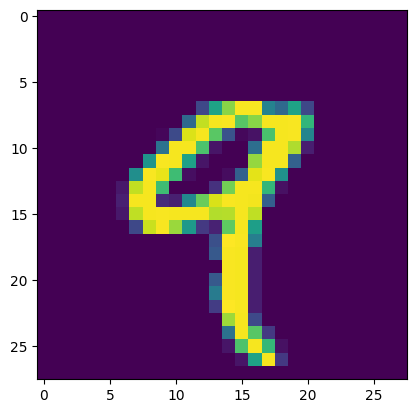

In [ ]:
plt.imshow(X_train[4])

In [ ]:
#Normalizar os dados em escala 0 e 1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
#Reshape dos dados para uma dimensao
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [ ]:
#Adicionando ruído
x_train_noisy = X_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [ ]:
x_train_noise = np.clip(x_train_noisy, 0.0,1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0,1.0)

###Criando modelo autoencoder

In [ ]:
#Criando camada de entrada
inputs = Input(shape=(784,))
encoder = Dense(32, activation='relu')(inputs)
decoder = Dense(784, activation='sigmoid')(encoder)
#criando modelo
autoencoder = Model(inputs, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noise, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test_noisy, X_test))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1837 - val_loss: 1.3179
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0041 - val_loss: 1.3084
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0040 - val_loss: 1.3057
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0040 - val_loss: 1.3049
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0040 - val_loss: 1.3056
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0040 - val_loss: 1.3035
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0040 - val_loss: 1.3039
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0040 - val_loss: 1.3038
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0040 - val_loss: 1.3033
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0040 - val_loss: 1.3055
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0040 - val_loss: 1.3020
Epoch 12/100
235/235 ━━━━━━━━━━━━━━

###Removendo ruído da imagem

In [ ]:
#escolhendo imagem aleatoria
idx = np.random.randint(X_test.shape[0])
original_image = X_test[idx]
#add ruido
noisy_image = original_image + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=original_image.shape)
#removendo dados fora da normalização
noisy_image = np.clip(noisy_image, 0.0, 1.0)
#removendo ruido
denoised_image = autoencoder.predict(np.expand_dims(noisy_image, axis=0))
#formato original
denoised_image = denoised_image.reshape(28,28)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


(-0.5, 27.5, 27.5, -0.5)

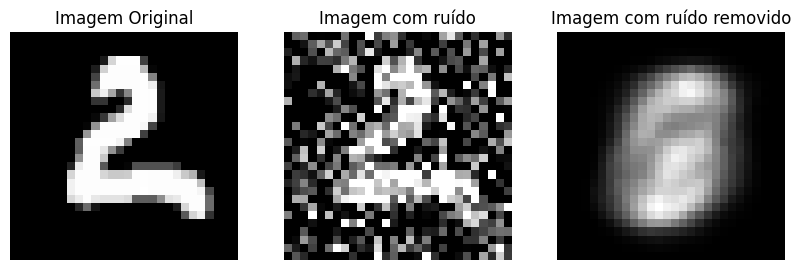

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(original_image.reshape(28,28), cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(noisy_image.reshape(28,28), cmap='gray')
plt.title('Imagem com ruído')
plt.axis('off')


plt.subplot(1,3,3)
plt.imshow(denoised_image, cmap='gray')
plt.title('Imagem com ruído removido')
plt.axis('off')
